In [61]:
'''

'''
import os
import cv2
import numpy as np

def center_crop(image, target_size):
    """
    对图像进行中心裁剪（裁剪高度和宽度）。
    :param image: 输入图像
    :param target_size: 目标分辨率 (height, width)
    :return: 裁剪后的图像
    """
    height, width = image.shape[:2]
    target_height, target_width = target_size

    # 计算裁剪区域的起始位置
    start_y = (height - target_height) // 2
    start_x = (width - target_width) // 2

    # 裁剪图像
    cropped_image = image[start_y:start_y + target_height, start_x:start_x + target_width]
    return cropped_image

def pad_image(image, target_size, pad_value=0):
    """
    对图像进行填充（填充高度和宽度）。
    :param image: 输入图像
    :param target_size: 目标分辨率 (height, width)
    :param pad_value: 填充值（默认为 0）
    :return: 填充后的图像
    """
    height, width = image.shape[:2]
    target_height, target_width = target_size

    # 计算需要填充的高度和宽度
    pad_height = max(target_height - height, 0)
    pad_width = max(target_width - width, 0)

    # 计算填充区域
    pad_top = pad_height // 2
    pad_bottom = pad_height - pad_top
    pad_left = pad_width // 2
    pad_right = pad_width - pad_left

    # 填充图像
    padded_image = cv2.copyMakeBorder(image, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=pad_value)
    return padded_image

def resize_image(image, target_size):
    """
    动态调整图像大小（调整高度和宽度）。
    :param image: 输入图像
    :param target_size: 目标分辨率 (height, width)
    :return: 调整后的图像
    """
    height, width = image.shape[:2]
    target_height, target_width = target_size

    if height > target_height or width > target_width:
        # 裁剪
        return center_crop(image, target_size)
    elif height < target_height or width < target_width:
        # 填充
        return pad_image(image, target_size)
    else:
        # 无需调整
        return image

def load_image_and_mask(image_path, mask_path, target_size=(500, 1254)):
    """
    加载图像和掩码，并调整大小。
    :param image_path: 图像文件路径
    :param mask_path: 掩码文件路径
    :param target_size: 目标分辨率 (height, width)
    :return: 调整后的图像和掩码
    """
    # 加载图像和掩码
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # 检查图像和掩码是否加载成功
    if image is None:
        print(f"Failed to load image: {image_path}")
        return None, None
    if mask is None:
        print(f"Failed to load mask: {mask_path}")
        return None, None

    # 调整大小
    image = resize_image(image, target_size)
    mask = resize_image(mask, target_size)
    #归一化
    image = image / 255.0
    mask = mask / 255.0
    
    return image, mask

def load_dataset(base_path, folders, target_size=(1254, 500)):
    """
    加载数据集中的所有图像和掩码，并调整大小。
    :param base_path: 数据集的根目录
    :param folders: 包含所有子文件夹名称的列表
    :param target_size: 目标分辨率 (height, width)
    :return: 图像和掩码的 NumPy 数组
    """
    images = []
    masks = []
    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        for file in os.listdir(folder_path):
            if file.endswith('.jpg'):  # 筛选图像文件
                image_path = os.path.join(folder_path, file)
                mask_path = os.path.join(folder_path, file.replace('.jpg', '_label.bmp'))
                if os.path.exists(mask_path):  # 检查掩码文件是否存在
                    image, mask = load_image_and_mask(image_path, mask_path, target_size)  # 加载并调整大小
                    if image is not None and mask is not None:  # 检查是否加载成功
                        images.append(image)
                        masks.append(mask)
    return np.array(images), np.array(masks)  # 转换为 NumPy 数组

# 数据集路径
base_path = r'Defect Dataset Used in Paper Two/KolektorSDD'  # 根据实际路径修改
folders = [f'kos{i:02d}' for i in range(1, 51)]  # 生成 kos01 到 kos50 的文件夹列表

# 加载数据集
target_size = (1254, 500)  # 目标分辨率
images, masks = load_dataset(base_path, folders, target_size)

In [62]:
#可视化
import matplotlib.pyplot as plt

def visualize_images_and_masks(images, masks, num_samples=5):
    """
    可视化图像和掩码。
    :param images: 图像数组
    :param masks: 掩码数组
    :param num_samples: 随机可视化的样本数量
    """
    # 随机选择一些样本
    indices = np.random.choice(len(images), num_samples, replace=False)

    # 创建画布
    plt.figure(figsize=(15, 5 * num_samples))

    for i, idx in enumerate(indices):
        # 显示图像
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Image {idx}")
        plt.axis('off')

        # 显示掩码
        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(masks[idx], cmap='gray')
        plt.title(f"Mask {idx}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

Loaded 399 images and 399 masks.
Images shape: (399, 500, 377)
Masks shape: (399, 500, 377)


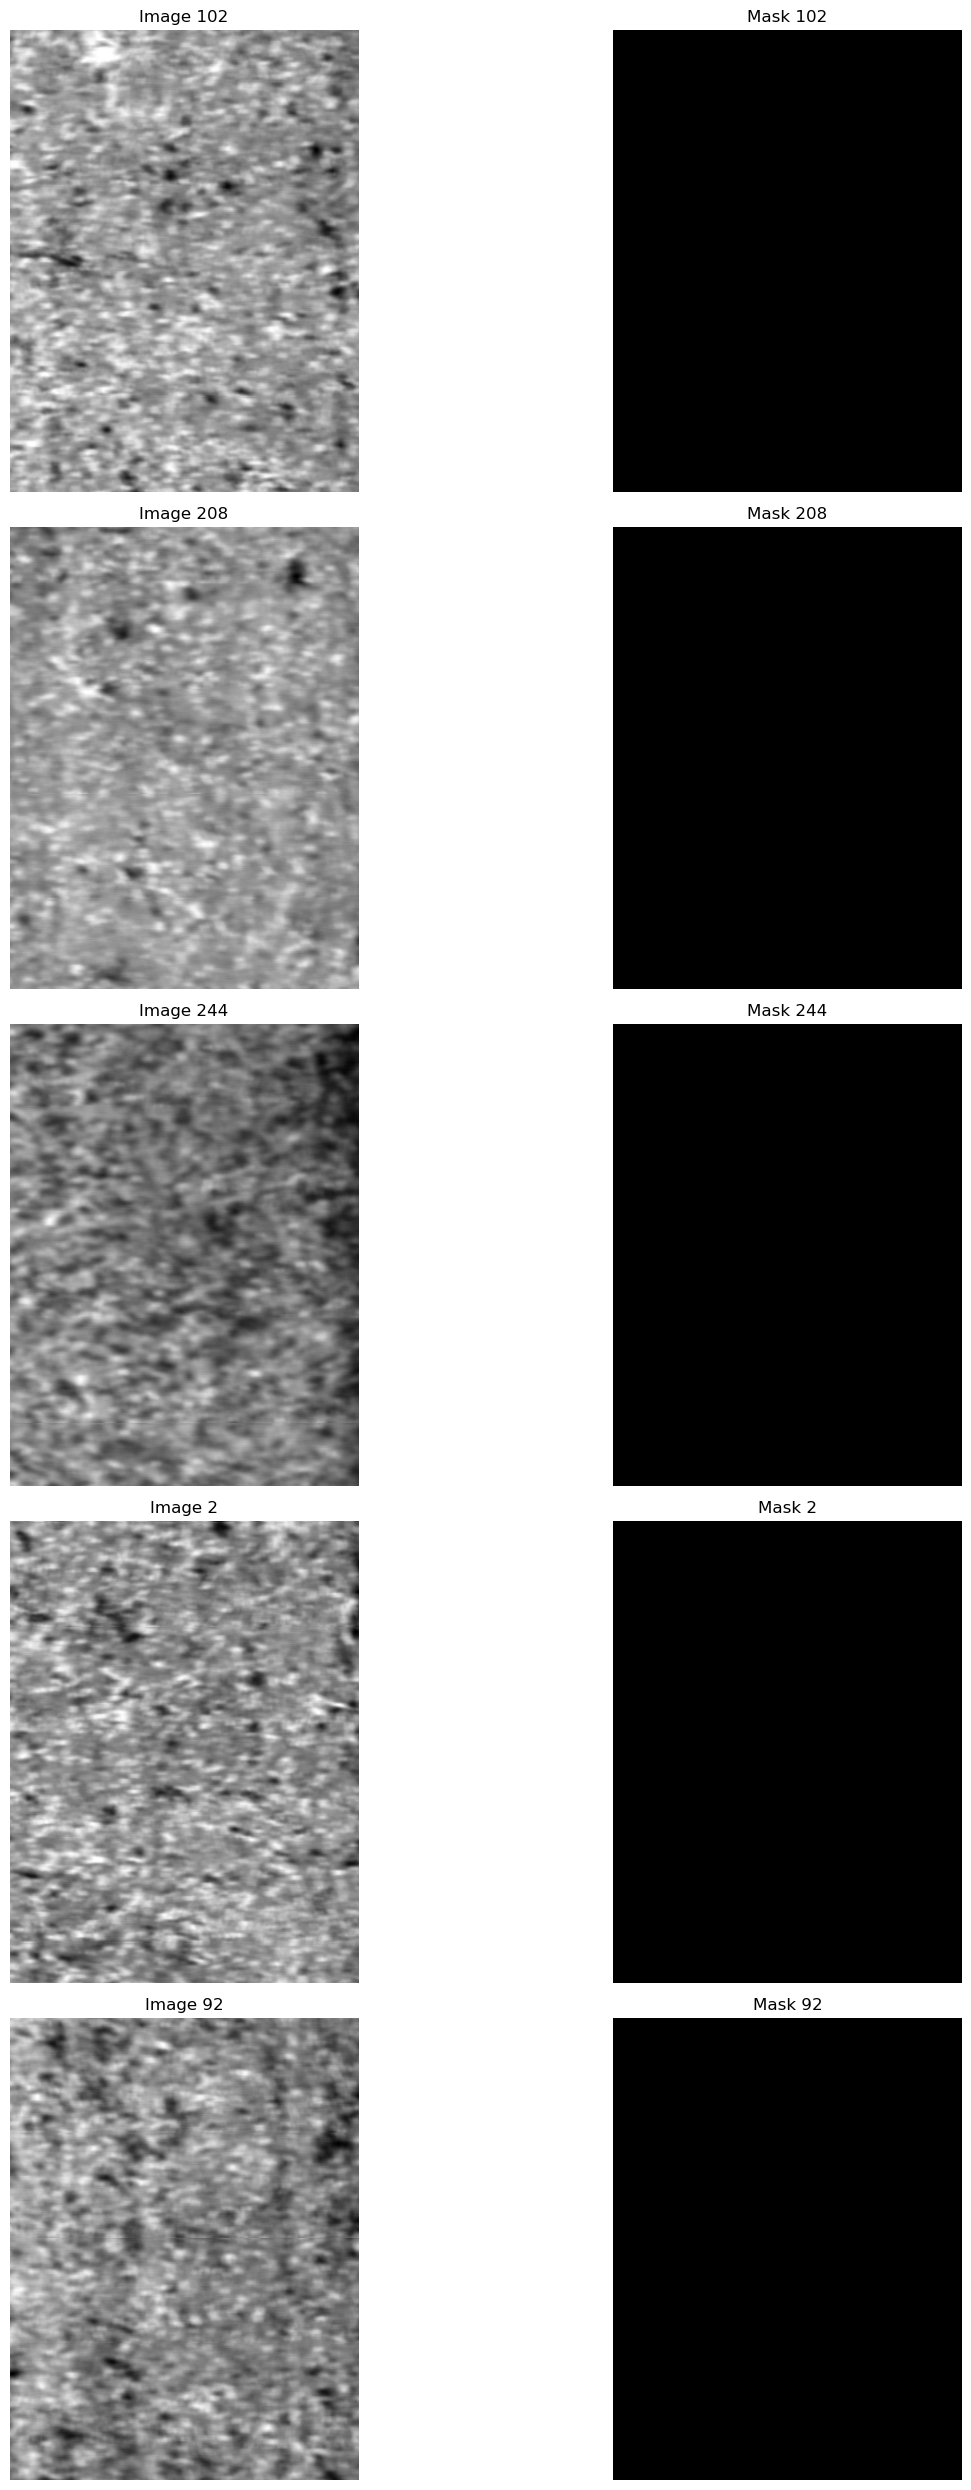

In [63]:
'''
测试代码，用来对可视化模块和数据加载模块进行测试
'''
# 加载数据集
target_size = (500, 1254)  # 目标分辨率
images, masks = load_dataset(base_path, folders, target_size)

# 打印加载结果
print(f"Loaded {len(images)} images and {len(masks)} masks.")
print(f"Images shape: {images.shape}")  # 打印图像的形状
print(f"Masks shape: {masks.shape}")    # 打印掩码的形状

# 可视化图像和掩码
visualize_images_and_masks(images, masks, num_samples=5)

In [64]:
'''
保存图像模块，用来测试加载图像与原图像的一致性，以及尺寸差异的大小
'''
import os
import cv2
import numpy as np

def save_random_samples(images, masks, num_samples=2, save_dir='saved_samples'):
    """
    随机选择图像和掩码，并保存为图片文件。
    :param images: 图像数组
    :param masks: 掩码数组
    :param num_samples: 随机选择的样本数量
    :param save_dir: 保存图片的目录
    """
    # 创建保存目录
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # 随机选择样本
    indices = np.random.choice(len(images), num_samples, replace=False)

    for i, idx in enumerate(indices):
        # 获取图像和掩码
        image = images[idx]
        mask = masks[idx]

        # 保存图像
        image_path = os.path.join(save_dir, f"image_{idx}.png")
        cv2.imwrite(image_path, image)

        # 保存掩码
        mask_path = os.path.join(save_dir, f"mask_{idx}.png")
        cv2.imwrite(mask_path, mask)

        print(f"Saved image and mask {idx} to {save_dir}")

# 加载数据集
target_size = (1254, 500)  # 目标分辨率
images, masks = load_dataset(base_path, folders, target_size)

# 保存随机样本
save_random_samples(images, masks, num_samples=2, save_dir='saved_samples')

Saved image and mask 189 to saved_samples
Saved image and mask 9 to saved_samples
